# Análise de Dados da Prova do ENEM 2022 - Parte 1: Explorando os dados, obtendo informações e insights sobre os candidatos 

Esta é a parte 1 do projeto de análise dos dados da prova do Exame Nacional do Ensino Médio (ENEM) 2022. Nessa etapa inicial, o objetivo foi explorar informações descritivas sobre os candidatos e suas notas, buscando obter insights que pudessem ajudar a entender mais sobre o desempenho acadêmico e abrir caminho para a análise dos indicadores socioeconômicos.

A análise, teve com objetivo de desvendar os padrões subjacentes aos dados do ENEM 2022, identificando tendências que podem oferecer valiosas perspectivas aos educadores, formuladores de políticas e, claro, aos próprios estudantes.

Foram explorados assuntos que possibilitaram examinar de perto as notas obtidas pelos estudantes em cada uma das provas, bem como informações demográficas relevantes, como idade, sexo e nível de escolaridade. Esse primeiro passo permitiu a construção de um panorama geral do desempenho dos candidatos no exame, destacando áreas de destaque e desafios. Além também de respostas sobre como o nível de escolaridade dos pais pode impactar o desempenho dos estudantes, constatando uma correlação entre o nível educacional familiar e o resultado nas provas do ENEM. 

A intenção deste projeto é fornecer uma compreensão abrangente dos dados coletados, contribuindo para uma discussão mais ampla sobre o sistema educacional brasileiro e suas necessidades. Nesse sentido, busco direcionar o olhar para a equidade de oportunidades, inclusão e qualidade do ensino.

In [1]:
import pandas as pd
import matplotlib as plt


In [2]:
colunas = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002'] 

### Importando os dados do Enem 2022

Essa base de dados trata-se das informações específicas das provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem 2022, e pode ser obtido no seguinte site:
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [3]:
microDadosEnem = pd.read_csv('DADOS/MICRODADOS_ENEM_2022.csv', sep = ";", encoding = 'ISO-8859-1', usecols=colunas)

In [15]:
microDadosEnem.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,210057943671,14,M,2,2,2,1,NaN,NaN,NaN,...,5300108,Brasília,DF,NaN,NaN,NaN,NaN,NaN,A,A
1,210057516120,14,M,2,1,16,1,NaN,NaN,NaN,...,5300108,Brasília,DF,NaN,NaN,NaN,NaN,NaN,D,D
2,210057280536,5,F,1,2,2,1,NaN,NaN,NaN,...,2925758,Presidente Tancredo Neves,BA,421.1,546.0,498.8,565.3,760.0,E,F
3,210055724397,6,M,1,3,2,1,NaN,NaN,NaN,...,3201308,Cariacica,ES,490.7,388.6,357.8,416.0,320.0,C,A
4,210055097896,4,M,0,3,1,1,NaN,NaN,NaN,...,1506203,Salinópolis,PA,NaN,NaN,NaN,NaN,NaN,D,B


### Verificando a distribuição de faixa etarias dos candidato

In [41]:
clSelecionadasFE = ['NU_INSCRICAO','TP_FAIXA_ETARIA']
dfFE = microDadosEnem.filter(items = clSelecionadasFE)

FaixaEtaria = {
1: 'Menor de 17 anos',
2: '17 anos',
3: '18 anos',
4: '19 anos',
5: '20 anos',
6: '21 anos',
7: '22 anos',
8: '23 anos',
9: '24 anos',
10: '25 anos',
11: 'Entre 26 e 30 anos',
12: 'Entre 31 e 35 anos',
13: 'Entre 36 e 40 anos',
14: 'Entre 41 e 45 anos',
15: 'Entre 46 e 50 anos',
16: 'Entre 51 e 55 anos',
17: 'Entre 56 e 60 anos',
18: 'Entre 61 e 65 anos',
19: 'Entre 66 e 70 anos',
20: 'Maior de 70 anos'}

In [42]:
dfFE['NO_FAIXA_ETARIA'] = [FaixaEtaria[idade] for idade in dfFE.TP_FAIXA_ETARIA]

In [58]:
coluna_faixaEtaria = dfFE['NO_FAIXA_ETARIA']
coluna_faixaEtaria.value_counts()

18 anos               805862
17 anos               711278
19 anos               408115
Menor de 17 anos      303605
20 anos               247679
Entre 26 e 30 anos    189700
21 anos               165982
22 anos               123260
Entre 31 e 35 anos    103634
23 anos                94849
Entre 36 e 40 anos     74162
24 anos                73338
25 anos                61564
Entre 41 e 45 anos     49735
Entre 46 e 50 anos     30066
Entre 51 e 55 anos     17688
Entre 56 e 60 anos      9688
Entre 61 e 65 anos      3817
Entre 66 e 70 anos      1505
Maior de 70 anos         578
Name: NO_FAIXA_ETARIA, dtype: int64

afim de facilitar a visualização do histograma a baixo, o eixo x está com o código de cada faixa etaria, conforme o dicionario de dados feito acima

<AxesSubplot:>

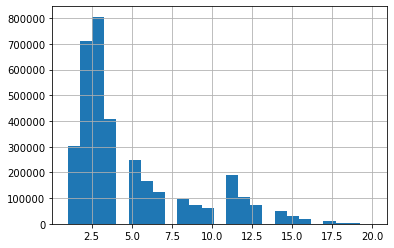

In [62]:
coluna_faixaEtaria = dfFE['TP_FAIXA_ETARIA']
coluna_faixaEtaria.hist(bins = 25)

A faixa etária com os maiores números de candidatos foi entre 17 e 19 anos, representando um impressionante total de 1925255 inscrições. O que representa 55% dos candidatos, uma vez que o ENEM teve 3476105 de inscrições.  A proximidade da idade de 18 anos com o término do ensino médio pode explicar esse pico significativo, uma vez que muitos estudantes se preparam e realizam o ENEM nessa idade para ingressar no ensino superior. Com o decorrer do tempo, observa-se que quanto maior a idade, existem menos pessoas fazendo a prova.

# Verificando quantidade de inscrições por estado

In [5]:
colunaUF = microDadosEnem['SG_UF_ESC']
colunaUF.value_counts()

SP    184295
CE    102972
MG     68869
RJ     68435
PR     50307
GO     47563
BA     44483
PE     43562
RS     41842
PA     34897
SC     31316
AM     27737
MA     27679
PB     21483
ES     19998
DF     19348
MT     16877
RN     16701
PI     16296
AL     15685
MS     13105
SE     10802
RO      9687
TO      7626
AC      4291
AP      3869
RR      2219
Name: SG_UF_ESC, dtype: int64

<AxesSubplot:>

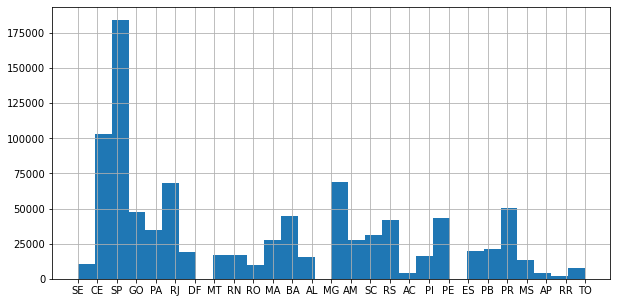

In [13]:
colunaUF.hist(bins = 30, figsize=(10, 5))

Analisando as inscrições por estado, pode verificar que em sua grande parte, é proporcional ao número populacional. Com excessão de algumas particularidades, como o estado do Ceará por exemplo ser o segundo com mais inscrições, mesmo sendo apenas o 8º mais populoso.

# Analise da quantidade de inscrições por cor/raça

In [21]:
cor_raca = ['NU_INSCRICAO','TP_COR_RACA']
dfcor_raca = microDadosEnem.filter(items = cor_raca)

In [22]:
DICT_COR_RACA = {0: 'Nao declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indigena', 6: 'Nao dispoe da informacao'}

dfcor_raca['NO_COR_RACA'] = [DICT_COR_RACA[cor] for cor in dfcor_raca.TP_COR_RACA]

#### Número absoluto

In [24]:
coluna_raca = dfcor_raca['NO_COR_RACA']
nAbsol = coluna_raca.value_counts()
nAbsol

Parda            1488844
Branca           1428081
Preta             408422
Amarela            66051
Nao declarado      64867
Indigena           19840
Name: NO_COR_RACA, dtype: int64

#### Percentual

In [26]:
(nAbsol/nAbsol.sum())*100

Parda            42.830812
Branca           41.082792
Preta            11.749415
Amarela           1.900144
Nao declarado     1.866083
Indigena          0.570754
Name: NO_COR_RACA, dtype: float64

A distribuição de inscritos por cor/raça, é também proporcional a população geral no país. 
Segundo o IBGE temos a seguinte porcentagem de raça/cor no Brasil:

Parda: 45,3%

Branca: 42,8%

Preta: 10,6%

Amarela: 0,83%

Indígena: 0,47%

# Analisando distribuição das notas dos candidatos das provas

<AxesSubplot:>

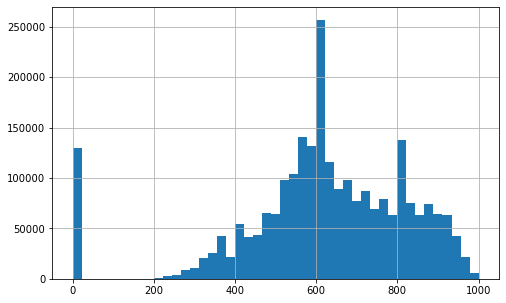

In [90]:
microDadosEnem['NU_NOTA_REDACAO'].hist(bins=45, figsize=(8, 5))

<AxesSubplot:>

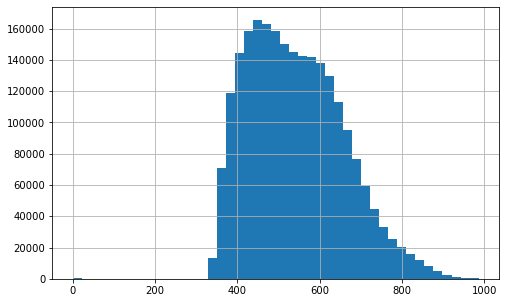

In [89]:
microDadosEnem['NU_NOTA_MT'].hist(bins=45, figsize=(8, 5))

<AxesSubplot:>

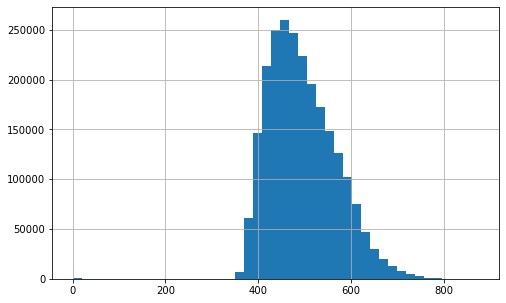

In [88]:
microDadosEnem['NU_NOTA_CN'].hist(bins=45, figsize=(8, 5))

<AxesSubplot:>

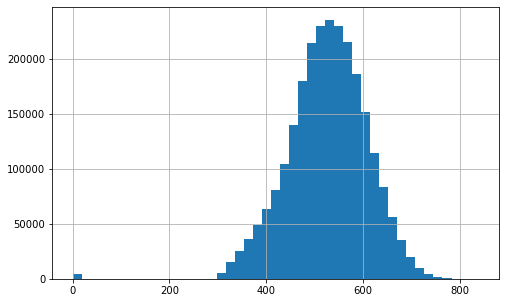

In [92]:
microDadosEnem['NU_NOTA_CH'].hist(bins=45, figsize=(8, 5))

<AxesSubplot:>

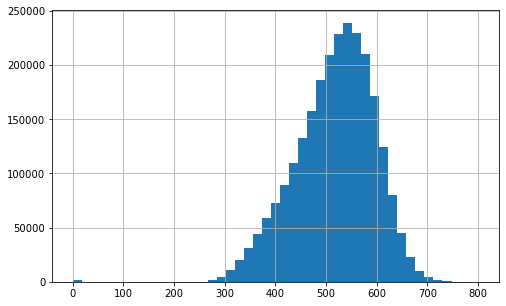

In [93]:
microDadosEnem['NU_NOTA_LC'].hist(bins=45, figsize=(8, 5))

In [104]:
round(microDadosEnem[['NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']].describe(), 2)

,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH
count,2493442.00,2355395.00,2355395.00,2493442.00,2493442.00
mean,618.48,542.50,495.93,517.44,526.95
std,212.21,116.02,72.01,77.55,81.48
min,0.00,0.00,0.00,0.00,0.00
25%,520.00,449.00,440.50,468.40,477.00
50%,620.00,530.80,485.60,525.50,529.90
75%,760.00,622.40,543.30,573.20,581.90
max,1000.00,985.70,875.30,801.00,839.20


Ao analisar a distribuição das notas dos participantes no ENEM, observamos padrões interessantes em relação ao desempenho dos estudantes nas diferentes provas. Essas análises nos fornecem insights valiosos sobre as áreas em que os candidatos obtiveram melhor ou pior desempenho, bem como a dispersão geral das notas em cada disciplina.

A prova de redação apresentou uma distribuição ampla, o que sugere que os candidatos obtiveram resultados variados nessa área. Esse cenário é esperado, considerando que a redação é uma prova subjetiva, na qual aspectos como estilo de escrita, coesão e argumentação desempenham um papel crucial. A existência de concentração em praticamente todo o range de notas indica que houve participantes que se destacaram, enquanto outros podem ter encontrado maiores desafios nesse aspecto.

Na prova de matemática, também encontramos uma distribuição relativamente bem dispersa, embora com uma concentração maior em torno de 540 pontos. Isso pode indicar que muitos estudantes obtiveram pontuações próximas a essa marca, sugerindo um nível médio de desempenho nessa disciplina. No entanto, é interessante notar que houve também candidatos com resultados mais baixos e mais altos, o que demonstra a diversidade de habilidades matemáticas dos participantes.

A análise da prova de ciências da natureza revelou que os candidatos obtiveram, em média, as notas mais baixas em comparação com as outras disciplinas. A concentração significativa em torno dos 460 pontos indica que muitos candidatos enfrentaram desafios nessa prova específica. Além disso, a alta concentração na extremidade esqueda, e baixa concentração na extremidade direita, sugere que houve poucos candidatos com notas muito altas, o que pode ser reflexo da complexidade das questões dessa área.

Por outro lado, a prova de ciências humanas apresentou uma distribuição mais centralizada, com notas médias em torno de 526 pontos. Essa distribuição linear tanto antes quanto depois da média sugere que muitos candidatos obtiveram pontuações próximas à média, sem grandes disparidades. Isso pode indicar uma maior homogeneidade no desempenho dos estudantes nessa disciplina, com uma quantidade significativa de candidatos com resultados moderados.

De forma similar à prova de ciências humanas, a prova de linguagens e códigos e suas tecnologias também teve uma distribuição centralizada, com notas médias próximas a 517 pontos. No entanto, essa prova apresentou uma concentração ligeiramente menor do que a prova de ciências humanas, o que pode indicar uma maior variabilidade no desempenho dos candidatos nessa área.

Essas análises ressaltam a importância de considerar as particularidades de cada disciplina e do exame como um todo. O ENEM abrange uma variedade de conhecimentos e habilidades, e as características de cada prova podem influenciar a distribuição das notas. Os insights obtidos podem auxiliar educadores e formuladores de políticas a identificar áreas que demandam maior atenção e a desenvolver estratégias para aprimorar o ensino e o aprendizado em disciplinas específicas.

Ademais, as informações sobre a distribuição das notas podem ser úteis para os próprios candidatos, que podem se beneficiar ao identificar suas áreas de força e fraqueza, a fim de direcionar seus esforços de estudo e preparação para futuros exames e oportunidades educacionais.

# Analisando informações referente ao sexo dos participantes

#### Número absoluto

In [27]:
coluna_sexo = microDadosEnem['TP_SEXO']
percentsexo = coluna_sexo.value_counts()
percentsexo

F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

#### Percentual

In [28]:
(percentsexo/percentsexo.sum())*100

F    61.002732
M    38.997268
Name: TP_SEXO, dtype: float64

#### Verificando se o sexo diz algo relevante sobre a nota de redação

In [35]:
colunaSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']
MicroDadosSexoRed = microDadosEnem.filter(items = colunaSelecionadas)
MicroDadosSexoRed = MicroDadosSexoRed.dropna()
MicroDadosSexoRed.groupby('TP_SEXO').describe()


NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1530098.0  628.922919  213.217841  0.0  540.0  640.0  780.0   
M              963344.0  601.892533  209.538737  0.0  520.0  600.0  740.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

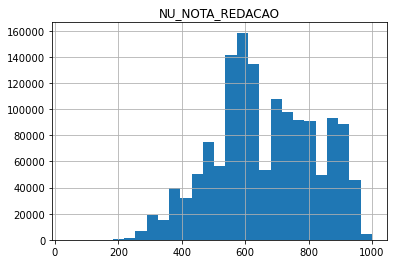

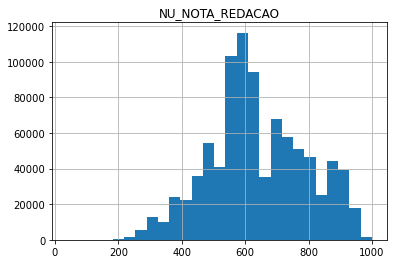

In [36]:
colunaNotaRed = microDadosEnem['NU_NOTA_REDACAO']
MicroDadosSexoRed[colunaNotaRed >0].groupby('TP_SEXO').hist(bins =27)

#### Analisando nota de matemática por sexo

In [47]:
colunaSelecionadas = ['TP_SEXO', 'NU_NOTA_MT']
MicroDadosSexoMt = microDadosEnem.filter(items = colunaSelecionadas)
MicroDadosSexoMt = MicroDadosSexoMt.dropna()
MicroDadosSexoMt.groupby('TP_SEXO').describe()

NU_NOTA_MT                                                         
             count        mean         std  min    25%    50%    75%    max
TP_SEXO                                                                    
F        1442276.0  526.608884  109.869121  0.0  438.6  512.1  602.2  985.7
M         913119.0  567.608393  120.943996  0.0  471.3  562.8  651.0  985.7

Ao realizar uma análise para verificar se o sexo dos candidatos influencia as notas de redação no ENEM, constatei que os resultados indicam uma tendência de similaridade entre os gêneros. Em outras palavras, não parece haver uma relação significativa entre o sexo dos candidatos e suas pontuações na prova de redação.

Esse achado é relevante, pois evidencia que, no geral, homens e mulheres apresentam desempenhos semelhantes quando se trata de habilidade acadêmicas. Essa conclusão é valiosa, pois indica que, pelo menos na amostra analisada, não existem diferenças marcantes entre os sexos em relação à proficiência nessa área específica.

Essa constatação pode ser interpretada de diversas maneiras. Em primeiro lugar, sugere que ambos os gêneros estão igualmente preparados para enfrentar os desafios propostos ENEM. Isso ressalta a importância de um sistema educacional inclusivo e aberto a todos, independentemente do sexo, proporcionando oportunidades iguais para que os estudantes desenvolvam suas habilidades de escrita.

Além disso, a ausência de diferenças significativas nas entre homens e mulheres pode ser um indicativo da equidade de gênero no acesso à educação e na igualdade de oportunidades educacionais. Mostra que as políticas e práticas educacionais estão permitindo que ambos os gêneros alcancem resultados semelhantes, proporcionando um ambiente de aprendizado justo e igualitário.

Contudo, é importante mencionar que, embora a análise indique uma tendência de similaridade nas notas de redação entre os sexos, existem diversas outras variáveis que podem influenciar o desempenho dos candidatos, como a preparação prévia, o contexto socioeconômico, o acesso a recursos educacionais, entre outros. Portanto, esses fatores devem ser levados em consideração em análises mais abrangentes sobre o desempenho dos estudantes no ENEM e em outras avaliações educacionais.

# Indicadores Socioeconômicos

Definindo dicionário de dados com as colunas Q001 e Q002

Q001 = Até que série seu pai, ou o homem responsável por você, estudou?

Q002 = Até que série sua mãe, ou a mulher responsável por você, estudou?

In [49]:
clSelecionadasIs = ['NU_INSCRICAO', 'SG_UF_ESC', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'NU_NOTA_MT']
dfIS = microDadosEnem.filter(items = clSelecionadasIs)
dfIS = dfIS.dropna()
Q001_Q002 = {
'A': 'Nunca estudou',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Nao sei'}

In [50]:
dfIS['NO_Q001'] = [Q001_Q002[resposta] for resposta in dfIS.Q001]

In [51]:
dfIS['NO_Q002'] = [Q001_Q002[resposta] for resposta in dfIS.Q002]

In [52]:
dfIS.head(5)

,NU_INSCRICAO,SG_UF_ESC,NU_NOTA_REDACAO,Q001,Q002,NU_NOTA_MT,NO_Q001,NO_Q002
40,210056717205,CE,560.0,C,D,430.4,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
55,210056012033,SP,900.0,D,F,905.5,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós..."
57,210056292241,GO,740.0,C,D,551.9,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
59,210054772114,PA,520.0,E,E,433.6,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
67,210055580862,RJ,540.0,D,E,438.0,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."


### Verificando distribuição da escolaridade do pai

In [53]:
clnQ001 = ['NO_Q001', 'NU_INSCRICAO']
dfq001 = dfIS.filter(items=clnQ001).groupby('NO_Q001').count().sort_values(by = 'NU_INSCRICAO', ascending = False)
dfq001

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",224216
"Completou a Faculdade, mas não completou a Pós-graduação",84773
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",79788
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",78947
Não completou a 4ª série/5º ano do Ensino Fundamental,76115
Nao sei,67457
Completou a Pós-graduação,67108
Nunca estudou,14511


### Verificando distribuição da escolaridade da mãe

In [55]:
clnQ002 = ['NO_Q002', 'NU_INSCRICAO']
dfq002 = dfIS.filter(items=clnQ002).groupby('NO_Q002').count().sort_values(by = 'NU_INSCRICAO', ascending = False)
dfq002

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",256673
"Completou a Faculdade, mas não completou a Pós-graduação",108968
Completou a Pós-graduação,107393
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",78427
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",60920
Não completou a 4ª série/5º ano do Ensino Fundamental,47607
Nao sei,25328
Nunca estudou,7599


## Verificando notas de acordo com a escolaridade do pai e mãe

#### Prova de matemática

In [56]:
clnQ001 = ['NO_Q001', 'NU_NOTA_MT']
dfq001 = dfIS.filter(items=clnQ001).groupby('NO_Q001').mean().sort_values(by = 'NU_NOTA_MT', ascending = False)
dfq001

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,630.480338
"Completou a Faculdade, mas não completou a Pós-graduação",609.502194
"Completou o Ensino Médio, mas não completou a Faculdade",553.386896
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",527.399756
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",517.821917
Nao sei,507.028305
Não completou a 4ª série/5º ano do Ensino Fundamental,497.965063
Nunca estudou,473.904307


In [57]:
clnQ002 = ['NO_Q002', 'NU_NOTA_MT']
dfq002 = dfIS.filter(items=clnQ002).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_MT', ascending = False)
dfq002

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,608.930371
"Completou a Faculdade, mas não completou a Pós-graduação",596.153677
"Completou o Ensino Médio, mas não completou a Faculdade",543.029683
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",514.163805
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",503.599636
Nao sei,494.747418
Não completou a 4ª série/5º ano do Ensino Fundamental,487.127172
Nunca estudou,465.544440


#### Redação

In [69]:
clnQ001 = ['NO_Q001', 'NU_NOTA_REDACAO']
dfq001 = dfIS.filter(items=clnQ001).groupby('NO_Q001').mean().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)
dfq001

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,750.400846
"Completou a Faculdade, mas não completou a Pós-graduação",723.644085
"Completou o Ensino Médio, mas não completou a Faculdade",650.063510
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",607.398857
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",590.885024
Não completou a 4ª série/5º ano do Ensino Fundamental,556.278263
Nao sei,554.672162
Nunca estudou,499.893874


In [59]:
clnQ002 = ['NO_Q002', 'NU_NOTA_REDACAO']
dfq002 = dfIS.filter(items=clnQ002).groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)
dfq002

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,727.584479
"Completou a Faculdade, mas não completou a Pós-graduação",706.425373
"Completou o Ensino Médio, mas não completou a Faculdade",633.235050
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",582.875540
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",564.171372
Não completou a 4ª série/5º ano do Ensino Fundamental,531.210956
Nao sei,512.120183
Nunca estudou,472.291091


<AxesSubplot:xlabel='Q001'>

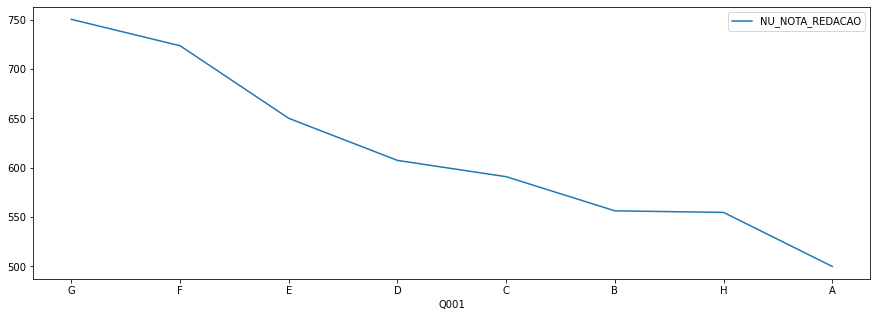

In [67]:
clnQ001 = ['Q001', 'NU_NOTA_REDACAO']
dfq001 = dfIS.filter(items=clnQ001).groupby('Q001').mean().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)
dfq001.plot(figsize=(15, 5))

In [70]:
dfIS.filter(items=clnQ001).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...         78947.0   
Completou a 8ª série/9º ano do Ensino Fundament...         79788.0   
Completou a Faculdade, mas não completou a Pós-...         84773.0   
Completou a Pós-graduação                                  67108.0   
Completou o Ensino Médio, mas não completou a F...        224216.0   
Nao sei                                                    67457.0   
Nunca estudou                                              14511.0   
Não completou a 4ª série/5º ano do Ensino Funda...         76115.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  590.885024  213.869084   
Completou a 8ª série/9º ano do Ensino Fundament...  607.398857  209.142478   
Completou a Faculdade, mas não completou a Pós-...  723.644085  170.762149   
Completou a Pós-graduação                           750.400846  163.136659   
Completou o Ensino Médio, mas não completou a F...  650.063510  193.379446   
Nao sei                                             554.672162  225.177520   
Nunca estudou                                       499.893874  243.121816   
Não completou a 4ª série/5º ano do Ensino Funda...  556.278263  224.036715   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  500.0  600.0  720.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  520.0  620.0  740.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  620.0  740.0  860.0   
Completou a Pós-graduação                           0.0  660.0  780.0  880.0   
Completou o Ensino Médio, mas não completou a F...  0.0  560.0  660.0  800.0   
Nao sei                                             0.0  480.0  580.0  700.0   
Nunca estudou                                       0.0  400.0  540.0  640.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  480.0  580.0  700.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...   980.0  
Completou a 8ª série/9º ano do Ensino Fundament...   980.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nao sei                                              980.0  
Nunca estudou                                        980.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0

## Gráfico referente a nota da redação de cada estado de acordo com o nível de escolaridade do pai

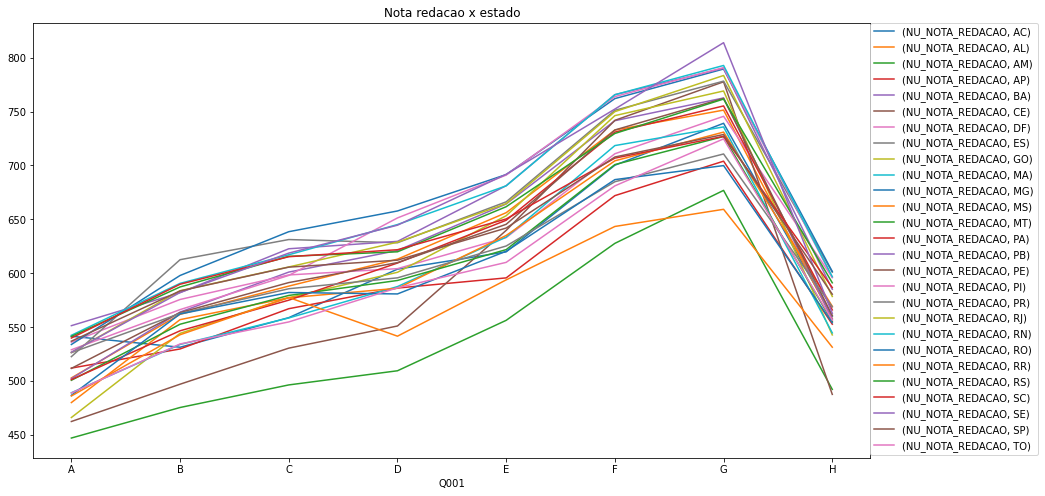

In [75]:
import matplotlib.pyplot as plt


ax = dfIS.filter(items=['SG_UF_ESC', 'Q001', 'NU_NOTA_REDACAO'])\
  .groupby(['Q001', 'SG_UF_ESC']).mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)\
  .unstack().plot(figsize=(15,8))


ax.set_title('Nota redacao x estado')
ax.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.)





Ao conduzir uma análise comparativa das notas do ENEM em relação ao nível de escolaridade dos pais dos candidatos, os resultados revelaram um padrão consistente e significativo: quanto maior o nível de escolaridade dos pais, melhores as notas dos estudantes em todas as provas. Da mesma forma, quanto menor o nível de escolaridade dos pais, piores foram as pontuações obtidas pelos candidatos.

Essa constatação traz à tona a forte influência que o nível educacional dos pais exerce no desempenho acadêmico de seus filhos. Essa relação pode ser atribuída a diversos fatores que se interconectam e impactam o ambiente de aprendizado e as oportunidades educacionais dos estudantes.

Em primeiro lugar, pais com maior nível de escolaridade tendem a possuir uma base de conhecimento mais sólida e uma maior compreensão dos processos educacionais. Essa maior bagagem intelectual pode facilitar a transmissão de habilidades de estudo, estímulo ao aprendizado e apoio ao desenvolvimento acadêmico dos filhos.

Além disso, famílias com maior nível educacional geralmente têm acesso a mais recursos educacionais, como livros, materiais de estudo e acesso à internet. Esses recursos podem ampliar as oportunidades de aprendizado dos estudantes e contribuir para um ambiente mais estimulante em casa.

Outro fator relevante é o papel dos pais como modelos de comportamento e aspirações acadêmicas. Quando os pais possuem um alto nível de educação, eles podem inspirar seus filhos a perseguirem metas educacionais mais elevadas, estimulando o desejo de buscar o sucesso acadêmico e profissional.

# Criando  DataFrame de média de notas por municipio

In [76]:
df = microDadosEnem.filter(items=['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                  'NU_NOTA_MT'])

In [77]:
mediaEnemPorMunicipio = df.filter(items = (['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                  'NU_NOTA_MT'])).groupby('NO_MUNICIPIO_ESC').mean()
mediaEnemPorMunicipio

,CO_MUNICIPIO_ESC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
NO_MUNICIPIO_ESC,,,,,,
Abadia de Goiás,5200050.0,611.111111,470.605882,475.105556,458.300000,477.217647
Abadia dos Dourados,3100104.0,666.250000,472.766667,516.025000,507.087500,537.646667
Abadiânia,5200100.0,644.358974,499.265714,525.533333,516.635897,560.051429
Abaetetuba,1500107.0,608.169839,476.868413,499.734846,479.685212,494.182435
Abaeté,3100203.0,655.172414,513.936207,556.582759,547.808621,594.905172
...,...,...,...,...,...,...
Áurea,4301552.0,600.000000,492.225000,541.450000,534.625000,520.025000
Ângulo,4101150.0,553.333333,491.237500,493.188889,445.166667,492.187500
Érico Cardoso,2900504.0,597.333333,455.826667,488.273333,469.506667,456.446667


In [78]:
mediaEnemPorMunicipio.to_csv('mediaEnemPorMunicipio.csv')